# Set up enviroment

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# Start

In [3]:
from sklearn.linear_model import LinearRegression

def buildModel():
  model = LinearRegression()
  return model

## Reading dataset

In [4]:
# dataset_path = '/content/drive/MyDrive/UIT/IS403/Source_Code_PTDLKD/Data Train 1-3-2019 1-3-2024/BIDV.csv'
df = pd.read_csv('BIDV.csv', index_col="Date")


In [5]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2019-03-01 00:00:00+07:00,23001.22852,23354.00781,23001.22852,23177.61914,1634348
2019-03-04 00:00:00+07:00,23354.00781,23812.62109,23283.45313,23706.78906,1375277
2019-03-05 00:00:00+07:00,23424.56445,24906.23828,23424.56445,24412.34766,5974891
2019-03-06 00:00:00+07:00,24412.34766,24624.01563,24271.23633,24518.18164,2411789
2019-03-07 00:00:00+07:00,24694.57031,24870.96094,24482.90234,24624.01563,2413192
2019-03-08 00:00:00+07:00,24306.51367,24482.90234,23918.45508,23989.01172,2563866
2019-03-11 00:00:00+07:00,24059.56836,24059.56836,23600.95508,23742.06641,1611841
2019-03-12 00:00:00+07:00,24059.56836,25047.34961,23847.90039,25047.34961,2395971
2019-03-13 00:00:00+07:00,24906.23828,25364.85156,24835.68359,25117.90625,4054826


In [6]:
print(f"Data shape: {df.shape}")

Data shape: (1306, 5)


## Data preprocessing

### Checking duplicates and null values

In [7]:
print("Duplicated")
df.duplicated().sum()

Duplicated


0

In [8]:
print("Null")
df.isnull().sum()

Null


Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

### Checking DataFrame information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 2019-03-01 00:00:00+07:00 to 2024-05-31 00:00:00+07:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1306 non-null   float64
 1   High    1306 non-null   float64
 2   Low     1306 non-null   float64
 3   Close   1306 non-null   float64
 4   Volume  1306 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 61.2+ KB


### Overview Data Descriptive statistic

In [10]:
df.describe()

,Open,High,Low,Close,Volume
count,1306.000000,1306.000000,1306.000000,1306.000000,1.306000e+03
mean,33337.503053,33821.588911,32892.856776,33335.271423,2.240560e+06
std,7084.029568,7169.639191,6990.191758,7058.435047,1.640112e+06
min,21590.111330,22225.113280,20813.996090,21590.111330,1.837970e+05
25%,28352.117190,28786.814450,28010.699220,28292.921880,1.188379e+06
50%,31397.382810,31812.937500,30954.343750,31397.382810,1.782868e+06
75%,38601.472660,39045.167970,38235.423833,38601.472660,2.759477e+06
max,54400.000000,56700.000000,53500.000000,54400.000000,1.846408e+07


## Linear Regression Model

### Split Data

In [11]:
df.reset_index(inplace=True)

features = df.index
target = df['Close']

def splitTrainTest(test_ratio):
    n_observations = len(df)

    train_size = int((1-test_ratio) * n_observations)
    test_size = n_observations - train_size

    x_train, x_test = (
        np.array(features[:train_size]).reshape(-1, 1),
        np.array(features[train_size:train_size + test_size]).reshape(-1, 1)
    )
    y_train, y_test = target[:train_size], target[train_size:train_size + test_size]

    return x_train, x_test, y_train, y_test

In [12]:
def makePlots(data):
    (test_ratio, x_train, y_train, x_test, y_test, y_pred, x_next_30_days, y_next_30_days) = data

    figname = f'BIDV__{int(10-test_ratio*10)}-{int(test_ratio*10)}'
    plt.title(figname)
    plt.xlabel('Index')
    plt.ylabel('Price')

    # train
    plt.plot(x_train, y_train)

    # test
    plt.plot(x_test, y_test)
    plt.plot(x_test, y_pred)

    # next 30 days
    plt.plot(x_next_30_days, y_next_30_days)

    # save plots and show
    plt.legend(['Train', 'Test', 'Predictions (Test)','Predictions (Next30Days)'])
    # plt.savefig("plots/%s.png" % figname,bbox_inches='tight')
    plt.show()

In [13]:
def evaluateAccuracy(y_test, y_pred):
    test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
    print('Testing RMSE:', test_rmse)

    test_mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
    print('Testing MAPE:', test_mape)

    test_mae = np.mean(abs(y_pred - y_test))
    print('Testing MAE:', test_mae)

In [14]:
# train:test 9:1 8:2 7:3
test_ratio = 0.1

print("==============================")
print('Test Ratio: ', test_ratio)

#====Start-Linear-Regression-model====#
# split train test by test_ratio
x_train, x_test, y_train, y_test= splitTrainTest(test_ratio)

print("Train: ", x_train.shape)
print("Test: ", x_test.shape)

# create linear regression model
model = buildModel()
model.fit(x_train, y_train)

# make prediction
y_pred = model.predict(x_test)

# compare actual and predicted price
comparison_data = {'Actual_Price':y_test, 'Predicted_Price':y_pred}
comparison_table = pd.DataFrame(comparison_data)
print(comparison_table)

# evaluate accuracy
evaluateAccuracy(y_test, y_pred)
#====End-Linear-Regression-model====#



#====Start-Predick-next-30-days====#
print("==============================")
last_index =  df.index[-1]
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
print("Next 30 Days:")
print(y_next_30_days)
#====End-Predick-next-30-days====#

Test Ratio:  0.1
Train:  (1175, 1)
Test:  (131, 1)
      Actual_Price  Predicted_Price
1175   38157.77734     38867.768600
1176   39178.27734     38879.855189
1177   38823.32031     38891.941778
1178   38069.03906     38904.028366
1179   38290.88672     38916.114955
...            ...              ...
1301   48900.00000     40390.678766
1302   49100.00000     40402.765354
1303   48600.00000     40414.851943
1304   47700.00000     40426.938531
1305   47100.00000     40439.025120

[131 rows x 2 columns]
Testing RMSE: 8937.589354564398
Testing MAPE: 0.15818636228431074
Testing MAE: 7874.295040260974
Next 30 Days:
[40451.11170857 40463.19829718 40475.28488579 40487.3714744
 40499.45806301 40511.54465163 40523.63124024 40535.71782885
 40547.80441746 40559.89100607 40571.97759468 40584.0641833
 40596.15077191 40608.23736052 40620.32394913 40632.41053774
 40644.49712636 40656.58371497 40668.67030358 40680.75689219
 40692.8434808  40704.93006941 40717.01665803 40729.10324664
 40741.18983525 40

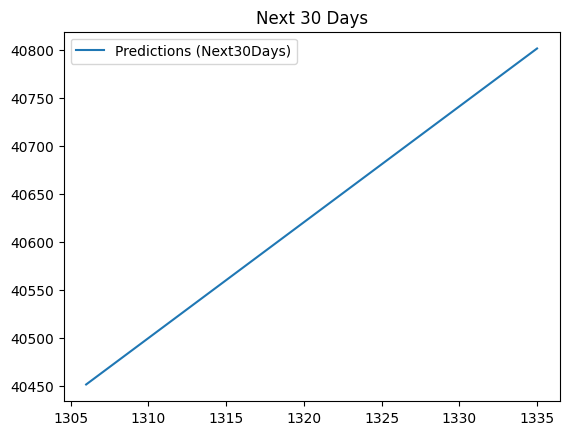

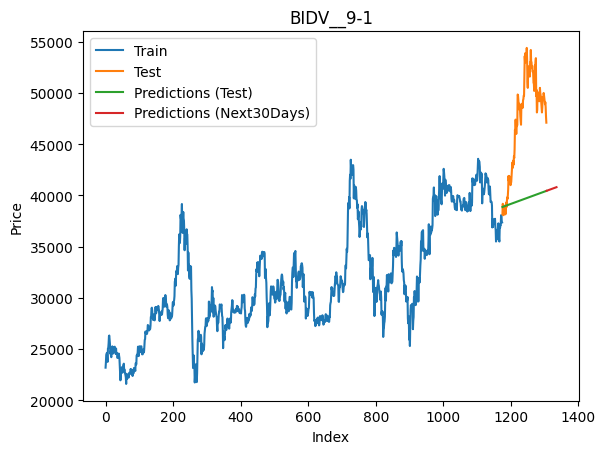

In [15]:
# use plots to display data
# next 30 days
plt.title("Next 30 Days")
plt.plot(x_next_30_days, y_next_30_days)
plt.legend(['Predictions (Next30Days)'])
plt.show()
# all
makePlots((test_ratio, x_train , y_train, x_test, y_test, y_pred, x_next_30_days, y_next_30_days))